# Heart Failure Prediction Model

In [ ]:
# Paquetes
import pandas as pd 
import numpy as np 

from sklearn.model_selection import train_test_split

# 1. Data

## 1.1. Download data

In [ ]:
import pandas as pd

heart = pd.read_csv('datain/heart_failure_clinical_records.csv') # Descargando los datos
heart.head() # Revisando si se cargaron bien los datos

## 1.2. Calidad de los datos

In [ ]:
# Valores perdidos (missings)
heart.isnull().sum()

In [ ]:
# Valores unicos
heart.nunique()

In [ ]:
# valores unicos uno por uno
for var in heart.columns:
    print(var, "\n")
    print(heart[var].unique())
    print("="*64, "\n")

# 2. Exploratory Data Analysis

## 2.1. Datos Básicos

In [ ]:
heart.describe().T

In [ ]:
heart.info()

## 2.2. Data distribution

DEATH_EVENT
0    0.6864
1    0.3136
Name: count, dtype: float64


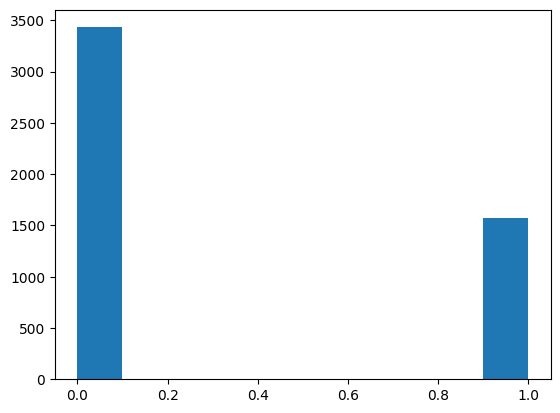

In [35]:
import matplotlib.pyplot as plt

# Tabla de distribución porcentual
print(heart['DEATH_EVENT'].value_counts()/len(heart))

# Histograma básico
plt.hist(heart['DEATH_EVENT'])
plt.show()

# 3. Machine Learning

Pasos a seguir para un modelo de Machine Learning:

1. Preprocesamiento de datos.
    - Separar X e Y.
    - Transformación de datos.
    - Separar base de datos de entrenamiento, validación (si aplica) y testeo.
2. Definir y entrenar el modelo de ML.
3. Predecir y evaluar por primera vez.
4. Tuneo de parámetros (con la base de validación o cross-validation).
5. Evaluar (con la base de testeo).

# 3.1. Preprocesamiento de datos

> ¿Qué es esto? Preprocesamiento de datos es la transformación de los datos para hacer un modelo de ML.
>
> ¿Como qué? Como la estandarización de variables (Min-Max, Standarization, otros), construcción de variables dummies, reescalamiento de variables (Logaritmos, Potencias, otros), entre otras.

### 3.1.1. Separamos X e Y

In [39]:
# Creamos Y
y = heart['DEATH_EVENT']
y

0       0
1       0
2       0
3       0
4       1
       ..
4995    0
4996    0
4997    1
4998    1
4999    0
Name: DEATH_EVENT, Length: 5000, dtype: int64

In [41]:
# Creamos X
X = heart.drop(['DEATH_EVENT'], axis = 1)
X

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,45.0,0,582,1,55,0,543000.00,1.0,132,0,0,250
4996,60.0,1,582,0,30,1,127000.00,0.9,145,0,0,95
4997,95.0,1,112,0,40,1,196000.00,1.0,138,0,0,24
4998,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


### 3.1.2. Transformación de datos

$$X_0 = \frac{X-X_{min}}{X_{max} - X_{min}}$$

In [43]:
from sklearn.preprocessing import MinMaxScaler

# Definir el escalamiento
scaler = MinMaxScaler()

# Aplicamos el escalamiento a los datos
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled)

# Chequeo la BDD
X_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
0,5000.0,0.368886,0.212677,0.0,0.181818,0.363636,0.509091,1.0
1,5000.0,0.474400,0.499394,0.0,0.000000,0.000000,1.000000,1.0
2,5000.0,0.071927,0.124615,0.0,0.012503,0.028706,0.071319,1.0
3,5000.0,0.439400,0.496364,0.0,0.000000,0.000000,1.000000,1.0
4,5000.0,0.359615,0.174467,0.0,0.242424,0.363636,0.469697,1.0
5,5000.0,0.364800,0.481422,0.0,0.000000,0.000000,1.000000,1.0
6,5000.0,0.290915,0.118802,0.0,0.230210,0.288833,0.345375,1.0
7,5000.0,0.097652,0.113455,0.0,0.044944,0.067416,0.101124,1.0
8,5000.0,0.680234,0.127550,0.0,0.600000,0.685714,0.771429,1.0
9,5000.0,0.645600,0.478379,0.0,0.000000,1.000000,1.000000,1.0


### 3.1.3. Separación base de datos entrenamiento, validación y testeo

In [118]:
from sklearn.model_selection import train_test_split

# Entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2024)

# Entrenamiento y validacion
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 2024)

print("Entrenamiento: \t", X_train.shape[0])
print("Validación:    \t", X_val.shape[0])
print("Testeo:        \t", X_test.shape[0])

Entrenamiento: 	 3200
Validación:    	 800
Testeo:        	 1000


## 3.2. Selección y entrenamiento de modelo

In [126]:
from sklearn.tree import DecisionTreeClassifier

# Definicion del modelo basico
clf = DecisionTreeClassifier()

In [127]:
# Entrenarlo
clf.fit(X_train, y_train)

DecisionTreeClassifier()

## 3.3. Predecir y evaluar por primera vez

> Debemos elegir una métrica para saber cómo se comporta el modelo.
>
> Ejemplos de métrica: Precisión (Accuracy), Precisión Balanceada (Balanced Accuracy), F1 Score, Sensitivity & Specificity.

> En este caso vamos a utilizar la precisión balanceada.


In [150]:
from sklearn.metrics import balanced_accuracy_score, accuracy_score

# Necesitamos una linea base (baseline): adivinar
y_pred = [0]*len(y_val)

# Evaluamos
print("Rendimiento adivinando:")
print("Precisión: \t\t", accuracy_score(y_val, y_pred))
print("Precisión balanceada: \t", balanced_accuracy_score(y_val, y_pred))

Rendimiento adivinando:
Precisión: 		 0.68125
Precisión balanceada: 	 0.5


> Mis modelos deben ser mejores que, al menos, adivinar los valores.

In [151]:
# Prediccion de mi modelo de ML
y_pred = clf.predict(X_val)

# Evaluamos
print("Rendimiento Árbol de Decisión:")
print("Precisión: \t\t", accuracy_score(y_val, y_pred))
print("Precisión balanceada: \t", balanced_accuracy_score(y_val, y_pred))

Rendimiento Árbol de Decisión:
Precisión: 		 0.9875
Precisión balanceada: 	 0.9856089224680697


## 3.4. Tuneo de híper-parámetros

### 3.4.1. Tuneo por Hold-On

In [242]:
# Modelo Hold-On de Hiperparametrizacion
params = {
    "criterion": ["gini", "entropy", "log_loss"],
    "splitter" : ["best", "random"],
    "max_depth" : [None, 1, 2, 3, 4, 5, 10, 20, 30],
    "max_features" : ["sqrt", "log2", 0.2, 0.4, 0.5, 0.6, 0.8],
    "max_leaf_nodes" : [None, 2, 3, 5, 10, 20, 30]
}

# Creo un dataframe de comparacion
res = pd.DataFrame(columns = [
    'criterion', 'splitter', 'max_depth', 'max_features',
    'max_leaf_nodes', 'accuracy_score', 'balanced_accuracy_score'
])

i = 1

# Ciclos de validacion
for crit in params['criterion']:
    for spl in params['splitter']:
        for mf in params['max_features']:
            for md in params['max_depth']:
                for ml in params['max_leaf_nodes']:

                    # Seleccion del modelo 
                    clf = DecisionTreeClassifier(
                        criterion = crit, splitter = spl,
                        max_features = mf, max_depth = md,
                        max_leaf_nodes = ml,
                        random_state = 2024
                    )

                    # Entrenamiento
                    clf.fit(X_train, y_train)

                    # Predecir
                    y_pred = clf.predict(X_val)

                    # Guardo los resultados
                    res = pd.concat([res, pd.DataFrame.from_dict({'criterion': [crit], 'max_depth': [md], 'max_features': [mf], \
                        'splitter': [spl], 'max_leaf_nodes': [ml], 'accuracy_score': [accuracy_score(y_val, y_pred)], \
                        'balanced_accuracy_score': [balanced_accuracy_score(y_val, y_pred)]})], ignore_index = True)
                    
                    i += 1

print(i)
                    

C:\Users\juanm\AppData\Local\Temp\ipykernel_21804\2194257708.py:40: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res = pd.concat([res, pd.DataFrame.from_dict({'criterion': [crit], 'max_depth': [md], 'max_features': [mf], \


2647


In [236]:
res = res.sort_values('balanced_accuracy_score', ascending = False).head(5)
res

,criterion,splitter,max_depth,max_features,max_leaf_nodes,accuracy_score,balanced_accuracy_score
1316,entropy,best,30,0.8,None,0.9875,0.987696
2142,log_loss,best,None,0.8,None,0.9875,0.987696
1309,entropy,best,20,0.8,None,0.9875,0.987696
1260,entropy,best,None,0.8,None,0.9875,0.987696
2191,log_loss,best,20,0.8,None,0.9875,0.987696


In [234]:
# Evaluacion final

# Definimos el modelo
clf = DecisionTreeClassifier(criterion = res.iloc[0]['criterion'], max_depth = res.iloc[0]['max_depth'],\
     max_features = res.iloc[0]['max_features'], splitter = res.iloc[0]['splitter'],
     max_leaf_nodes = res.iloc[0]['max_leaf_nodes'], random_state = 2024)

# Entrenamos
clf.fit(X_train, y_train)

# Predicción
y_pred = clf.predict(X_test)

# Evaluacion final
balanced_accuracy_score(y_test, y_pred)

0.9814881305842873

### 3.2.2. Tuneo por Randomized Cross-Validation

In [248]:
from sklearn.model_selection import RandomizedSearchCV

# Validacion Cruzada Aleatoria (Cross-Validation)
params = {
    "criterion": ["gini", "entropy", "log_loss"],
    "splitter" : ["best", "random"],
    "max_depth" : [None, 1, 2, 3, 4, 5, 10, 20, 30],
    "max_features" : ["sqrt", "log2", 0.2, 0.4, 0.5, 0.6, 0.8],
    "max_leaf_nodes" : [None, 2, 3, 5, 10, 20, 30]
}

# Definimos el modelo
clf = DecisionTreeClassifier()

# Cross_Validation
clf_est = RandomizedSearchCV(clf, params, n_iter = 10, cv = 10, scoring='balanced_accuracy',
                             random_state = 2024)

# Entrenamos
clf_est.fit(X_train, y_train)

# Prediction
y_pred = clf_est.predict(X_test)

# Evaluacion final
balanced_accuracy_score(y_test, y_pred)

0.8303573483582598